In [3]:
!pip install SimpleITK


In [ ]:
import os
import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


Annotations: 1186


100%|██████████| 1186/1186 [02:55<00:00,  6.76it/s]


3D samples: (487, 64, 64, 64, 1)


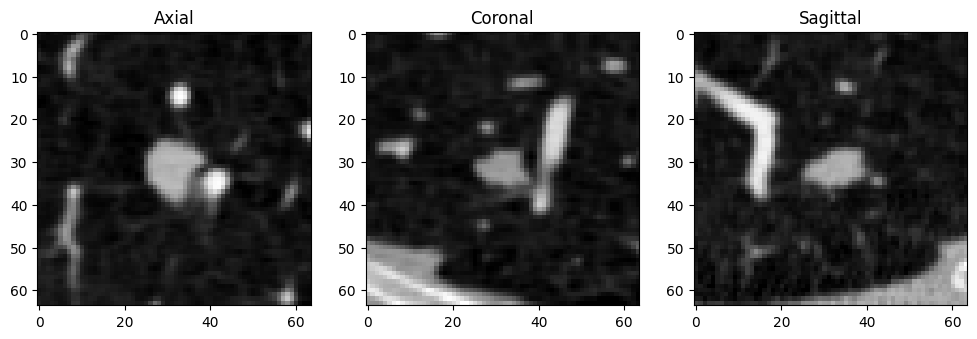

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1770387027.473081     505 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 64, 64, 64, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 32, 32, 32, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 32, 32, 32, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 16, 16, 16, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 16, 16, 16,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 8, 8, 8, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 294,209 (1.12 MB)

 Trainable params: 294,209 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1770387031.347040     564 service.cc:152] XLA service 0x7b12cc026f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770387031.347070     564 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1770387031.744859     564 cuda_dnn.cc:529] Loaded cuDNN version 91002


 5/78 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5433 - loss: 0.5153

I0000 00:00:1770387034.976751     564 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9373 - loss: 0.0952 - val_accuracy: 1.0000 - val_loss: 3.2653e-05
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 1.0000 - loss: 1.7623e-05 - val_accuracy: 1.0000 - val_loss: 1.1490e-05
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 1.0000 - loss: 7.7969e-06 - val_accuracy: 1.0000 - val_loss: 6.1061e-06
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 1.0000 - loss: 6.5291e-06 - val_accuracy: 1.0000 - val_loss: 3.7493e-06
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 1.0000 - loss: 1.6099e-06 - val_accuracy: 1.0000 - val_loss: 2.4692e-06
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 1.0000 - loss: 1.5364e-06 - val_accuracy: 1.0000 - val_loss: 1.7184e-06
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 1.0000 - loss: 1.2415e-06 - val_accuracy: 1.0000 - val_loss: 1.2612e-06
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 1.0000

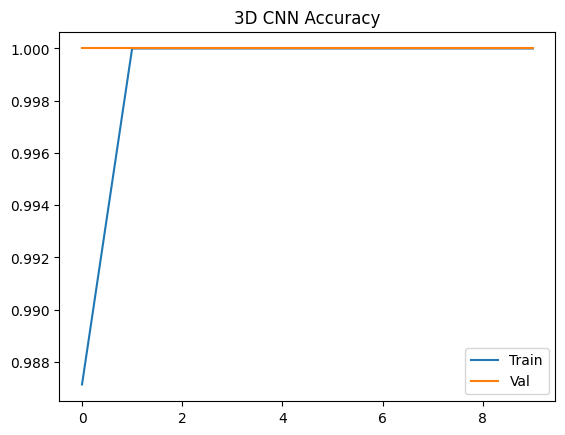

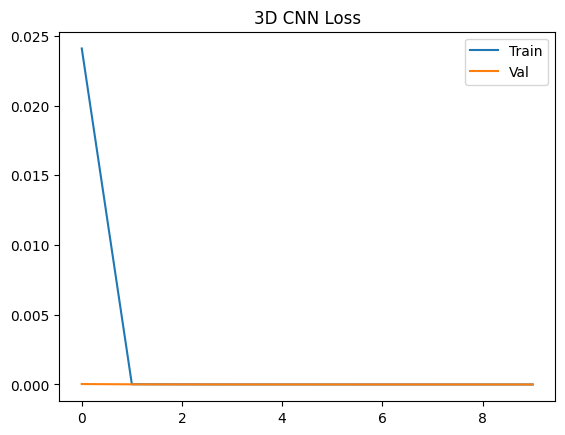

In [ ]:
LUNA_ROOT = "/kaggle/input/luna16"
ANNOTATIONS_PATH = f"{LUNA_ROOT}/annotations.csv"
SUBSETS = [0,1,2,3]  
PATCH_SIZE = 64       
annotations_df = pd.read_csv(ANNOTATIONS_PATH)
print("Annotations:", len(annotations_df))
annotations_df.head()

def load_mhd(path):
    img = sitk.ReadImage(path)
    volume = sitk.GetArrayFromImage(img)#(Z, Y, X)
    origin = np.array(img.GetOrigin())
    spacing = np.array(img.GetSpacing())
    return volume, origin, spacing
def find_mhd(series_uid):
    for s in SUBSETS:
        files = glob(f"{LUNA_ROOT}/subset{s}/subset{s}/*.mhd")
        for f in files:
            if series_uid in f:
                return f
    return None
def extract_3d_patch(volume, center, size=64):
    D, H, W = volume.shape
    cz, cy, cx = center.astype(int)
    r = size // 2
    #clamp center inside volume
    cz = np.clip(cz, r, D - r)
    cy = np.clip(cy, r, H - r)
    cx = np.clip(cx, r, W - r)
    patch = volume[
        cz-r:cz+r,
        cy-r:cy+r,
        cx-r:cx+r
    ]

    pad_z = max(0, size - patch.shape[0])
    pad_y = max(0, size - patch.shape[1])
    pad_x = max(0, size - patch.shape[2])

    patch = np.pad(
        patch,
        ((0, pad_z), (0, pad_y), (0, pad_x)),
        mode="constant"
    )

    return patch[:size, :size, :size]

X = []
y = []
for _, row in tqdm(annotations_df.iterrows(), total=len(annotations_df)):
    mhd_path = find_mhd(row["seriesuid"])
    if mhd_path is None:
        continue

    volume, origin, spacing = load_mhd(mhd_path)
    center_world = np.array([row["coordZ"], row["coordY"], row["coordX"]])
    center_voxel = np.rint((center_world - origin[::-1]) / spacing[::-1])
    patch = extract_3d_patch(volume, center_voxel, PATCH_SIZE)
    #normalize
    patch = (patch - np.mean(patch)) / (np.std(patch) + 1e-5)
    X.append(patch[..., np.newaxis])
    y.append(1)  
X = np.array(X)
y = np.array(y)
print("3D samples:", X.shape)

def show_patch(patch):
    mid = patch.shape[0] // 2
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(patch[mid,:,:], cmap='gray')
    plt.title("Axial")

    plt.subplot(1,3,2)
    plt.imshow(patch[:,mid,:], cmap='gray')
    plt.title("Coronal")

    plt.subplot(1,3,3)
    plt.imshow(patch[:,:,mid], cmap='gray')
    plt.title("Sagittal")

    plt.show()

show_patch(X[0][:,:,:,0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def build_3d_cnn(input_shape=(64,64,64,1)):
    model = models.Sequential([
        layers.Conv3D(32, 3, activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling3D(2),

        layers.Conv3D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling3D(2),

        layers.Conv3D(128, 3, activation='relu', padding='same'),
        layers.MaxPooling3D(2),

        layers.GlobalAveragePooling3D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_3d_cnn()
model.summary()

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=4,
    callbacks=[early_stop]
)

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3D CNN Accuracy')
plt.legend(['Train','Val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3D CNN Loss')
plt.legend(['Train','Val'])
plt.show()

